# Tarea 6: Integración con Taylor

Fecha de envío del PR inicial: **viernes 5 de mayo**

Fecha de aceptación del PR: **martes 16 de mayo, antes de la clase**

---

## Ejercicio 1

Usando su implementación de polinomios de Taylor, escriban un integrador para la ecuación diferencial que se desarrolló en este ejemplo, esto es, $\dot{x} = x^2$ con la condición inicial $x(0) = 3$. 

El integrador debe hacer las operaciones necesarias para obtener automáticamente los coeficientes $x_{[k]}$, *en cada paso de integración*, a partir de la condición inicial local. Un requisito básico para esto es que tengan una implementación de la función $P_\alpha(x) = [g(x)]^\alpha$ con $g(x)$ un polinomio de Taylor, que hicieron en la "Tarea5", y que funcione bien en particular para `alpha::Int`.

La implementación debe consistir de varias funciones: 

- Una función donde se calculen los coeficientes $x_{[k]}$ de la expansión. Esta función deberá llamar a otra donde se implementan las recurrencias que imponen las ecuaciones de movimiento.

- Una función donde se obtenga el paso de integración $h$ como se describió en el notebook 10.

- Otra función donde se haga la suma usando el método de Horner.

- Finalmente, una función que combine las funciones anteriores para hacer la integración desde un tiempo inicial a uno final. En este punto, *fingiremos ignorancia*, en el sentido de  que el tiempo inicial es cero, y el tiempo final será $0.5$ (que está más allá de donde la solución está definida).


Dado que conocemos la solución analítica de este problema, grafiquen como función de $t$ el error relativo de su integrador (respecto al valor del resultado analítico).

---

## Ejercicio 2

Repitan la integración del ejercicio anterior usando el método de Runge-Kutta de 4o orden con paso de integración fijo (que es lo más sofisticado que conocen hasta ahora) y comparen los resultados del error relativo con los obtenidos con el método de Taylor. En particular, finjan ignorancia de la misma manera que en el ejercicio anterior.

In [17]:
"""
se hará el método de runge-kutta para resolver una ecuación diferencial de la forma dx/dt=f(x,t),
considerando el valor de una condicion inicial en t_0, con cierto número de pasos, y cierto valor en x_0
"""
function runge_kutta_4(f,t_0=0,x_0=0,t_f=1,n=100)
    t=Array(Number,1) #"t"
    x=Array(Number,1)   #"x"
    h=(t_f-t_0)/n
    t[1]=t_0
    x[1]=x_0
    for i in 1:n
        k_1=f(t[i],x[i])     #condiciones necesarias para definir el siguiente valor de "t" y de "x"
        k_2=f(t[i]+(h*(1/2)),x[i]+((1/2)*((k_1)*h)))
        k_3=f(t[i]+(h*(1/2)),x[i]+((1/2)*((k_2)*h)))
        k_4=f(t[i]+h,x[i]+((k_3)*h))
        m=x[i]+(1/6)*(h)*(k_1+2*k_2+2*k_3+k_4)
        if (m!=Inf && m!=-Inf)
        push!(x,m)
        n=x_0+h*i
        push!(t,n)
        else 
            break
        end
    end
    return t,x
end

runge_kutta_4

In [18]:
f(t,x)=x^2

f (generic function with 1 method)

, Any) in module Main at In[14]:1 overwritten at In[18]:1.


In [19]:
R_K=runge_kutta_4(f,0,3,1000)

(Number[0,13.0,23.0],Number[3,2.9384e18,1.2568e306])

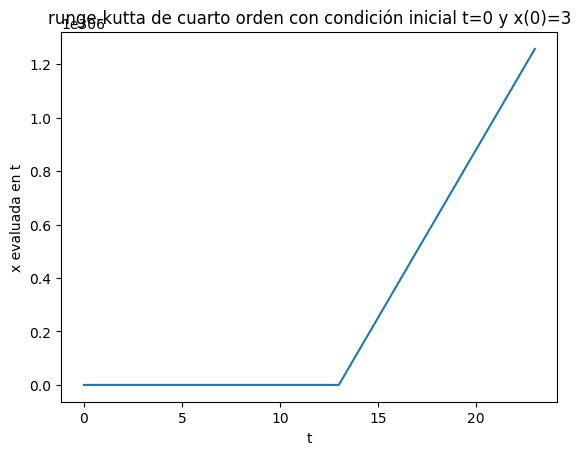

In [20]:
using PyPlot
plot(R_K[1],R_K[2])
title("runge-kutta de cuarto orden con condición inicial t=0 y x(0)=3")
xlabel("t")
ylabel("x evaluada en t")
show()

Ahora, se debe evaluar el error relativo con este método.

In [6]:
Error=[]
for i in 1:length(R_K[1])
    valor=abs((R_K[2][i])-(3/(1-(3*R_K[1][i]))))    #se usa el resultado de la forma analítica
    push!(Error,valor)
end

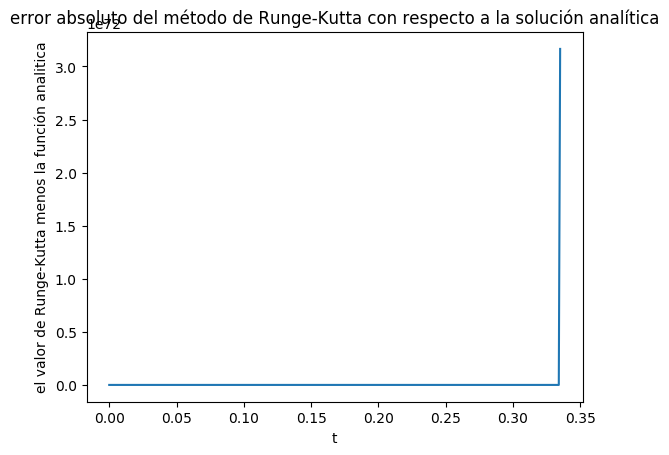

In [7]:
plot(R_K[1],Error)
title("error absoluto del método de Runge-Kutta con respecto a la solución analítica")
xlabel("t")
ylabel("el valor de Runge-Kutta menos la función analitica")
show()

---

## Ejercicio 3

Integra la ecuación de movimiento para el oscilador armónico, $\ddot{x} = -2x$, con $x(0)=2$, $\dot{x}(0)=0$, durante 10^4 periodos de oscilación (o sea, hasta $t_f = 10^4 \cdot 2\pi/\sqrt{2}$, usando el método de Taylor y el método de Runge-Kutta de 4o orden con paso de integración constante. Compara cómo cambia la energía (respecto al valor al tiempo cero) en función del tiempo en ambos métodos.

In [8]:
g(x,t)=-2x

g (generic function with 1 method)

In [9]:
function runge_kutta_4_2(f,x_0=2,y_0=0,t_f=1,n=1000)
    t_0=0
    h=(t_f-t_0)/(n)
    t=zeros(Number,n)
    x=zeros(Number,length(t))
    y=zeros(Number,length(t))

    for i in 1:n
        t[i]=i*h
    end
    x[1]=x_0
    y[1]=y_0
    a(t,x,y)=y
    b(t,x,y)=f(t,x)
    for i in 1:length(t)-1
        k1=a(t[i],x[i],y[i])
        l1=b(t[i],x[i],y[i])
        k2=a((t[i]+((1/2)*h)),x[i]+((1/2)*(k1)*h),y[i]+((1/2)*(l1)*h))
        l2=b((t[i]+((1/2)*h)),x[i]+((1/2)*(k1)*h),y[i]+((1/2)*(l1)*h))
        k3=a((t[i]+((1/2)*h)),x[i]+((1/2)*(k2)*h),y[i]+((1/2)*(l2)*h))
        l3=b((t[i]+((1/2)*h)),x[i]+((1/2)*(k2)*h),y[i]+((1/2)*(l2)*h))
        k4=a((t[i]+h),(x[i]+h*(k3)),(y[i]+h*(l3)))
        l4=b((t[i]+h),(x[i]+h*(k3)),(y[i]+h*(l3)))
        x[i+1]=x[i]+(1/6)*(h)*(k1+(2*k2)+(2*k3)+k4)
        y[i+1]=y[i]+(1/6)*(h)*(l1+(2*l2)+(2*l3)+l4)
    end
    return t,x
end

runge_kutta_4_2 (generic function with 5 methods)

In [10]:
RK2=runge_kutta_4_2(f,2,0,(10^4)*(2*pi/(sqrt(2))),10)

(Number[4442.88,8885.77,13328.6,17771.5,22214.4,26657.3,31100.2,35543.1,39985.9,44428.8],Number[2,1.28185e21,2.16307e104,Inf,Inf,Inf,Inf,Inf,Inf,Inf])

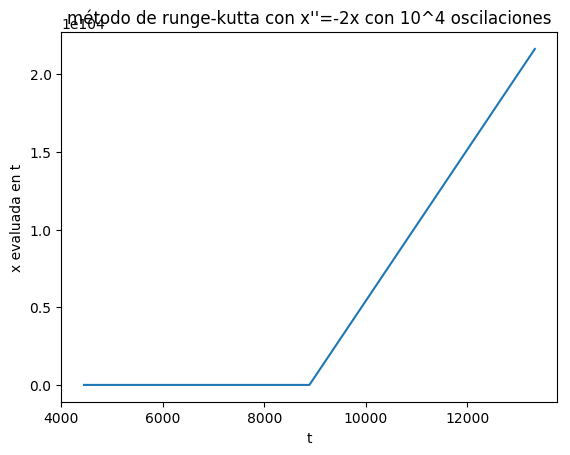

In [11]:
plot(RK2[1],RK2[2])
title("método de runge-kutta con x''=-2x con 10^4 oscilaciones")
xlabel("t")
ylabel("x evaluada en t")
show()

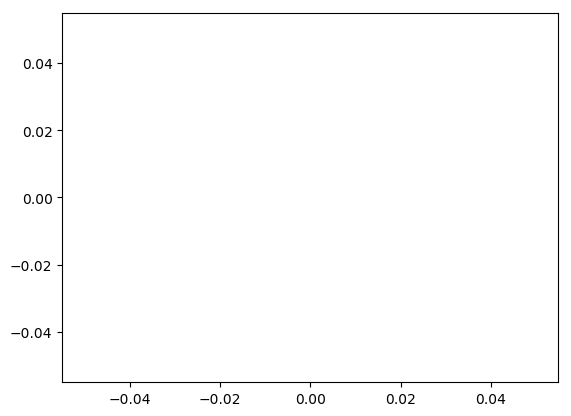

In [12]:
#energía con el método de runge-kutta
Errort=[]
Errorx=[]
for i in 2:length(RK2[1])-1
    if (RK2[2][i]>RK2[2][i-1]   &&   RK2[2][i]>RK2[2][i+1])
        push!(Errort,RK2[1][i])
        push!(Errorx,RK2[2][i])
    end
end
plot(Errort,Errorx)
show()